In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d_rating = pd.read_csv('data/ml-20m/ratings.csv')
d_tags = pd.read_csv('data/ml-20m/tags.csv')
d_movies = pd.read_csv('data/ml-20m/movies.csv')

# Original Thoughts
First thought is to combine ratings with number of tags. Idea is that better movies will have more boundings with users. Therefore more tag will be created

In [7]:
d_rating.sample(1)

,userId,movieId,rating,timestamp
19615493,135795,5047,1.5,1185859948


In [35]:
d_tags.sample(1)

,userId,movieId,tag,timestamp
72855,17608,31410,anti-Semitism,1264968393


In [12]:
d_movies.sample(1)

,movieId,title,genres
18611,92658,Kino-Eye (Kinoglaz) (1924),Documentary


In [5]:
#a = 0
d_proc = pd.DataFrame()

l_id = list()
l_score = list()
l_tags = list()
for row in d_movies.iterrows():
    #a += 1
    #if (a < 1000):
        m_id = row[1]['movieId']
        scores = d_rating[d_rating['movieId'] == m_id]
        users = scores.shape[0]
        l_id.append(m_id)
        l_score.append(scores['rating'].sum()/users)

        tags = d_tags[d_tags['movieId'] == m_id]
        uniqusers = tags['userId'].nunique()
        num_tag = 0
        if (uniqusers != 0):
            num_tag = float(tags.shape[0])/uniqusers
        l_tags.append(num_tag)
        

d_proc['movieId'] = l_id
d_proc['avg_rating'] = l_score
d_proc['num_tags'] = l_tags

#users
#data = d_tagtitles[(d_tags['userId']==50466) & (d_tags['movieId']==109487)]
#data

/home/kaidong/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


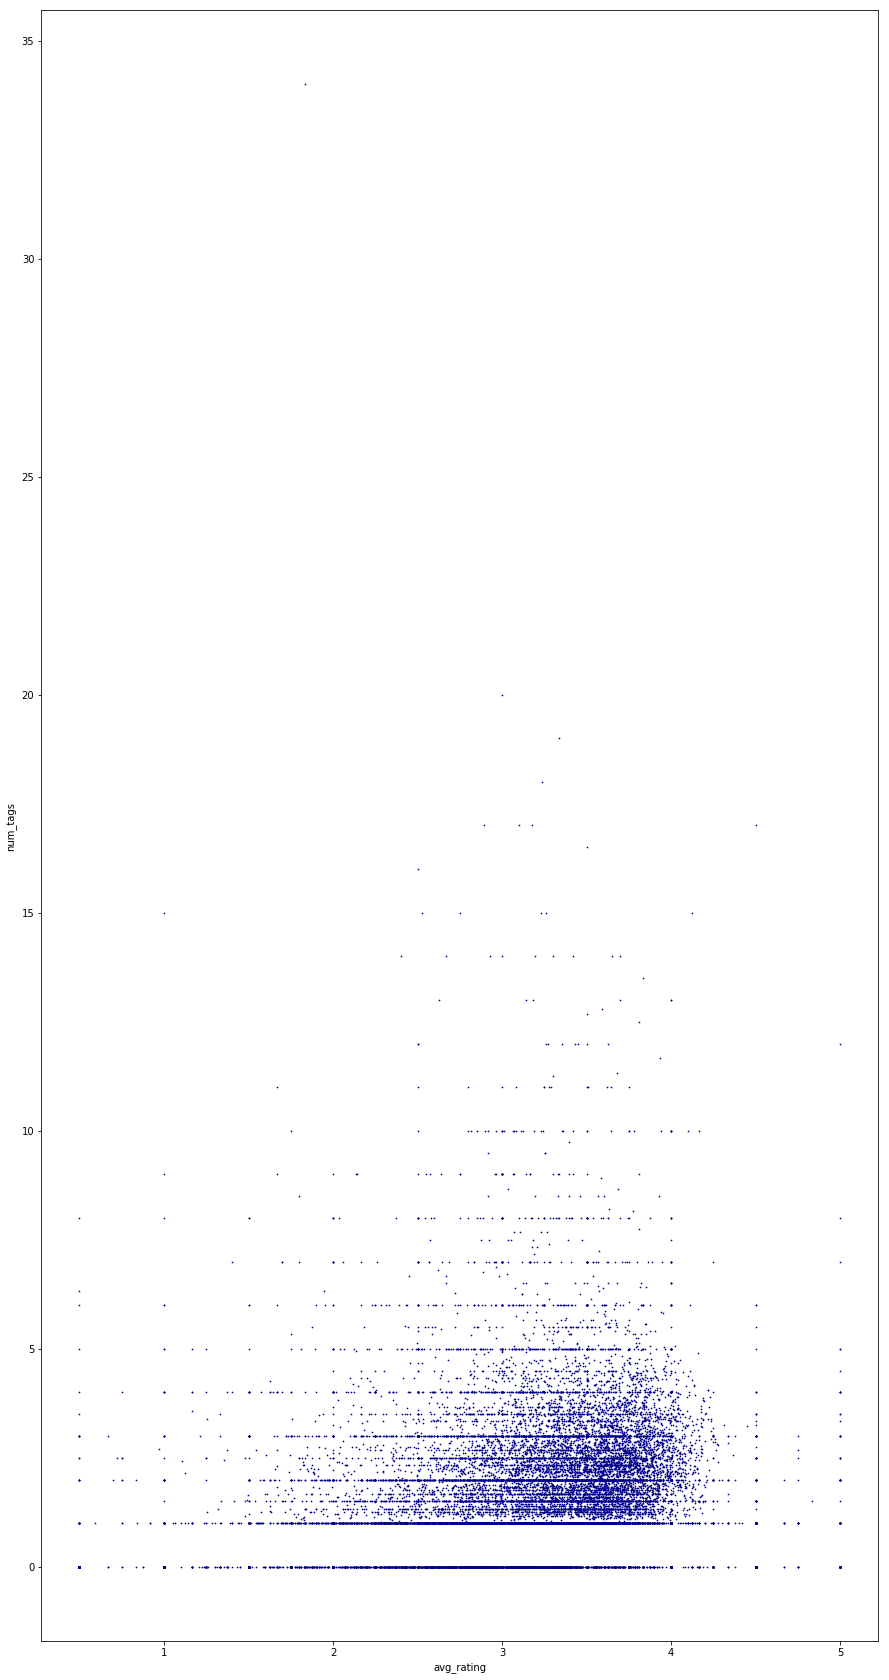

In [9]:
plot_tags_rating = d_proc.plot.scatter(x='avg_rating', y='num_tags', c='DarkBlue', figsize=(15, 30), s=0.5)

Originally I'm using default size points in the plot. In the dense part of the plot, we cannot tell the different of density. With smaller points in the scatter plot, we can see higher rating movie tends to have more tags related to it. To better visualize the data, I will round the result of the number of tags to integer, and calculate average ratings of certain number of tags.

In [15]:
d_num_rate = pd.DataFrame()

l_tags_int = list()
for row in d_movies.iterrows():
        m_id = row[1]['movieId']

        tags = d_tags[d_tags['movieId'] == m_id]
        uniqusers = tags['userId'].nunique()
        num_tag = 0
        if (uniqusers != 0):
            num_tag = tags.shape[0]/uniqusers
        l_tags_int.append(num_tag)
        

d_proc['num_tag_int'] = l_tags_int

[ 2  1  3  8  0  5  4  7  6 14 34 11 10  9 18 19 20 13 15 12 17 16]


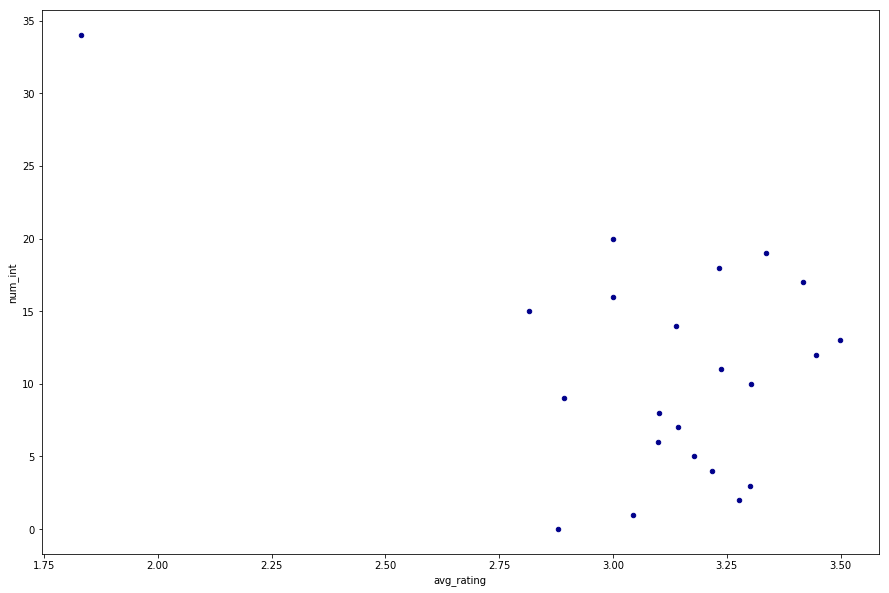

In [23]:
uniq_tag_num = d_proc['num_tag_int'].unique()
rate_avg = [0] * len(uniq_tag_num)

print uniq_tag_num

for index, num in enumerate(uniq_tag_num):
    l_same_num = d_proc[d_proc['num_tag_int'] == num]
    rate_avg[index] = l_same_num['avg_rating'].sum() / l_same_num.shape[0]
    
d = {'num_int': uniq_tag_num, 'avg_rating': rate_avg}
df_nr = pd.DataFrame(data=d)

plot_tag_int = df_nr.plot.scatter(x='avg_rating', y='num_int', c='DarkBlue', figsize=(15, 10))